# Heart Attack Analysis Prediction

In this project, different models from classical statistics and machine learning are used to predict the occurrence of heart disease (narrowing of the coronary arteries).

## Content:
* [Preparations](#Kap0)
* [Exploratory Data Analysis](#Kap1)
* [Logistic Regression](#Kap2)
* [Decision Tree](#Kap3)
* [Random Forest](#Kap4)
* [Support Vector Machines](#Kap5)
* [Comparison of Models](#Kap6)

## Preparations <a class="anchor" id="Kap0"></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

Import dataset


In [2]:
df = pd.read_csv("heart.csv") 
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

### Data description <a class="anchor" id="Kap1"></a>

In total, there are 14 variables and 303 cases in the dataset. The variables are the following:

   output (heart disease) - 0 = heart disease (defined as narrowing of >50% in one of the coronary vessels), 1 = no heart disease.
    
   Socio-demographic variables:

   *  age - Age in years; continuous variable;

   *  sex - Gender; binary variable (1 = male; 0 = female)

    
   Clinical parameters, test results, symptoms:
    
   * cp - Chest pain (angina pectoris); categorical variable (0 = asymptomatic, 1 = atypical angina, 2 = non-cardiac thoracic symptoms (?), 3 = typical angina).  

   * trtbps - Resting blood pressure (in mm Hg) on admission to hospital; continuous variable.

   * chol - Serum cholesterol (in mg/dl); continuous variable.

   * fbs - Blood glucose > 120 mg/dl; binary variable (0 = no, 1 = yes)

   * restecg - Resting ECG results; categorical (0 = normal; 1 = ST-T changes; 2 = hypertrophy).

   * thalachh - maximum heart rate reached; continuous variable.

   * exng - Angina pectoris under stress; binary variable (0 = no, 1 = yes).

   * oldpeak - ST-segment depression (under stress relative to rest); continuous variable.

   * slp - The slope of the peak exercise ST segment; categorical variable (0 = upsloping, 1 = flat, 2 = downsloping).

   * caa - Fluoroscopy: Number of major vessels (0-3) colored by fluoroscopy; categorical variable (0-3; 4 = missing value)

   * thall- Thallium stress); categorical variable (1 = fixed defect, 2 = normal, 3 = reversable defect, 0 = Missing value)
   
    
   The following variables are added by dummy coding:
   *  cp_1 = 1 = atypical angina
   *  cp_2 = 1 = Non-cardiac thoracic complaints
   *  cp_3 = 1= typical angina
   *  Reference cp = normal
          
   *  restecg_1 = 1 = ST-T changes
   *  restecg_2 = 1 = Hypertrophy
   *  Referenz restecg = normal
    
   *  slp_1 = 1 = flat
   *  slp_2 = 1 = downsloping
   *  Reference slp = upsloping
    
   *  thall_2 = 1 = normal
   *  thall_3 = 1 = reversable defect
   *  Reference thall = fixed defect   
    


### Remove double case
When reviewing the data set, it was noticed that one case occurred twice. This will be removed:

In [4]:
df.drop_duplicates(inplace = True)

### Recode missing values
In the Kaggle data set, missing values for two variables (caa, thall) were replaced by numbers. This must be reversed to avoid false estimates:

In [5]:
df["caa"].replace(4,np.nan, inplace=True)
df["thall"].replace(0, np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       298 non-null    float64
 12  thall     300 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.4 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.674497,2.330000,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.938202,0.585014,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


### Create train and test set

We divide the data set into a training and test set in order to set up and test the models. The ratio of training and test set is 80/20.

In [7]:
from sklearn.model_selection import train_test_split
heart_train, heart_test = train_test_split(df, test_size = 0.2, random_state = 15)

### Impute
After training and test sets have been formed, the missing values can be imputed. Imputation is done using the median, since the variables to be imputed are dummy and integer variables. Since imputing does not necessarily lead to better results, the models are later trained once with the data set with missing values and once with the data set in which the missing values were imputed.

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(heart_train)
#Impute missing values in training data
heart_train_imp = imputer.transform(heart_train)
heart_train_imp = pd.DataFrame(heart_train_imp, columns = heart_train.columns)
#Impute missing values in test data
heart_test_imp = imputer.transform(heart_test)
heart_test_imp = pd.DataFrame(heart_test_imp, columns = heart_test.columns)

In [9]:
heart_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       241 non-null    float64
 1   sex       241 non-null    float64
 2   cp        241 non-null    float64
 3   trtbps    241 non-null    float64
 4   chol      241 non-null    float64
 5   fbs       241 non-null    float64
 6   restecg   241 non-null    float64
 7   thalachh  241 non-null    float64
 8   exng      241 non-null    float64
 9   oldpeak   241 non-null    float64
 10  slp       241 non-null    float64
 11  caa       241 non-null    float64
 12  thall     241 non-null    float64
 13  output    241 non-null    float64
dtypes: float64(14)
memory usage: 26.5 KB


### Create dummy variables

Dummy variables are created for the (categorical) factor variables (cp, slp, restecg, thall). Not k-1 variables are created, i.e. the first factor level is not dropped.

In [10]:
#Remove missing values
heart_train = heart_train.dropna()
heart_test = heart_test.dropna()

In [11]:
def dummies(dataframe, columns):
    dummy_df = pd.get_dummies(data = dataframe, columns = columns, dtype = np.float64)
    return dummy_df

In [12]:
dummy_vars = ['cp','slp','restecg','thall']
#Dummy variables for data set with missing values
heart_train = dummies(heart_train,dummy_vars)
heart_test = dummies(heart_test,dummy_vars)
#Dummy variables for data set with imputed values
heart_train_imp = dummies(heart_train_imp, dummy_vars)
heart_test_imp = dummies(heart_test_imp, dummy_vars)

In [13]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 226 to 246
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        238 non-null    int64  
 1   sex        238 non-null    int64  
 2   trtbps     238 non-null    int64  
 3   chol       238 non-null    int64  
 4   fbs        238 non-null    int64  
 5   thalachh   238 non-null    int64  
 6   exng       238 non-null    int64  
 7   oldpeak    238 non-null    float64
 8   caa        238 non-null    float64
 9   output     238 non-null    int64  
 10  cp_0       238 non-null    float64
 11  cp_1       238 non-null    float64
 12  cp_2       238 non-null    float64
 13  cp_3       238 non-null    float64
 14  slp_0      238 non-null    float64
 15  slp_1      238 non-null    float64
 16  slp_2      238 non-null    float64
 17  restecg_0  238 non-null    float64
 18  restecg_1  238 non-null    float64
 19  restecg_2  238 non-null    float64
 20  thall_1.

In [14]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 75 to 295
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        58 non-null     int64  
 1   sex        58 non-null     int64  
 2   trtbps     58 non-null     int64  
 3   chol       58 non-null     int64  
 4   fbs        58 non-null     int64  
 5   thalachh   58 non-null     int64  
 6   exng       58 non-null     int64  
 7   oldpeak    58 non-null     float64
 8   caa        58 non-null     float64
 9   output     58 non-null     int64  
 10  cp_0       58 non-null     float64
 11  cp_1       58 non-null     float64
 12  cp_2       58 non-null     float64
 13  cp_3       58 non-null     float64
 14  slp_0      58 non-null     float64
 15  slp_1      58 non-null     float64
 16  slp_2      58 non-null     float64
 17  restecg_0  58 non-null     float64
 18  restecg_1  58 non-null     float64
 19  restecg_2  58 non-null     float64
 20  thall_1.0 

All the necessary preparations have been made and the data analysis can begin.

## Exploratory Data Analysis <a class="anchor" id="Kap1"></a>


* Descriptive statistics
* Exploratory plots
* Correlations
* Data transformation/Feature scaling (Standardise)

In [15]:
# Descriptive statistics for all variables in the dataset
heart_train.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,cp_3,slp_0,slp_1,slp_2,restecg_0,restecg_1,restecg_2,thall_1.0,thall_2.0,thall_3.0
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,54.428571,0.659664,132.008403,248.000000,0.147059,149.394958,0.344538,1.096639,0.693277,0.529412,...,0.075630,0.084034,0.478992,0.436975,0.500000,0.487395,0.012605,0.054622,0.563025,0.382353
std,9.018566,0.474821,17.805795,53.197824,0.354911,23.542123,0.476219,1.191385,0.942681,0.500186,...,0.264963,0.278023,0.500611,0.497057,0.501054,0.500894,0.111797,0.227720,0.497057,0.486986
min,29.000000,0.000000,100.000000,131.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.250000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,241.500000,0.000000,152.500000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,277.500000,0.000000,166.000000,1.000000,1.750000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory plots

<Axes: xlabel='age', ylabel='Count'>

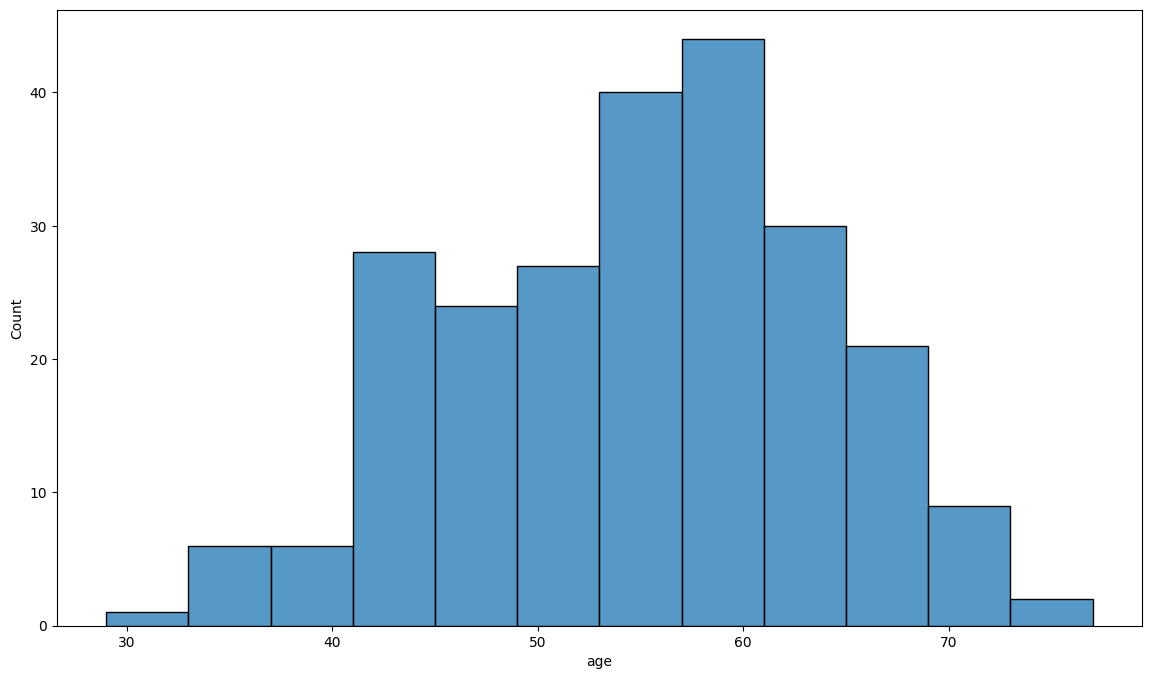

In [16]:
#Histogram age
import seaborn as sns
plt.figure(figsize=(14,8))
sns.histplot(heart_train['age'], kde=False)

The age is approximately normally distributed between Min = 29 and Max = 77 years.

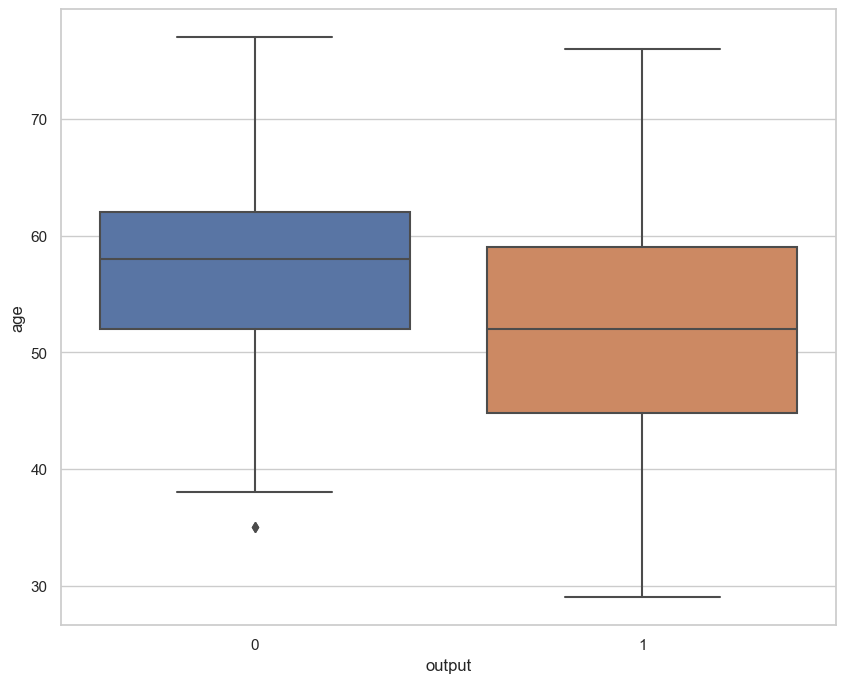

In [17]:
#Age and heart disease
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='age', data=df, orient="v")

**Does age have an influence on the probability of a heart attack?** With higher age, heart disease is more frequent (output = 0).

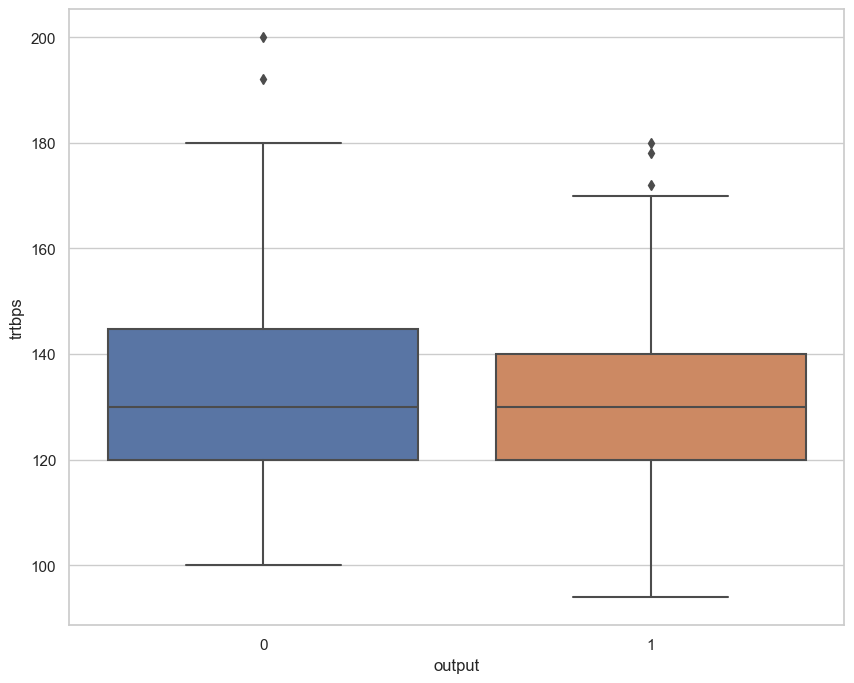

In [18]:
#Blood pressure and heart disease
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='trtbps', data=df, orient="v")

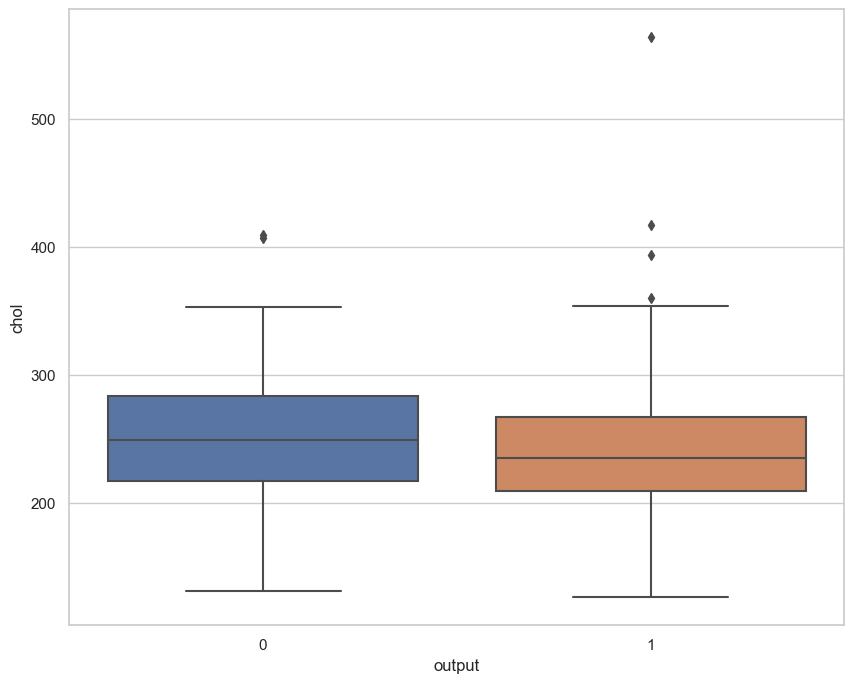

In [19]:
#Cholesterol level and heart disease
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='chol', data=df, orient="v")

**Do known risk factors show up in the data set as influencing a heart attack?** Elevated blood pressure is a significant risk factor for heart disease. However, in the data set, cases with heart disease (output = 0) have only minimally higher blood pressure. This could indicate drug treatment of elevated blood pressure. If this were the case, the results would have to be considered against this background, as there is no variable in the data set that records this. What is striking, however, are the different scattering effects in both groups.An elevated cholesterol level is also a risk factor. In contrast to blood pressure, there are clearer differences between the groups.

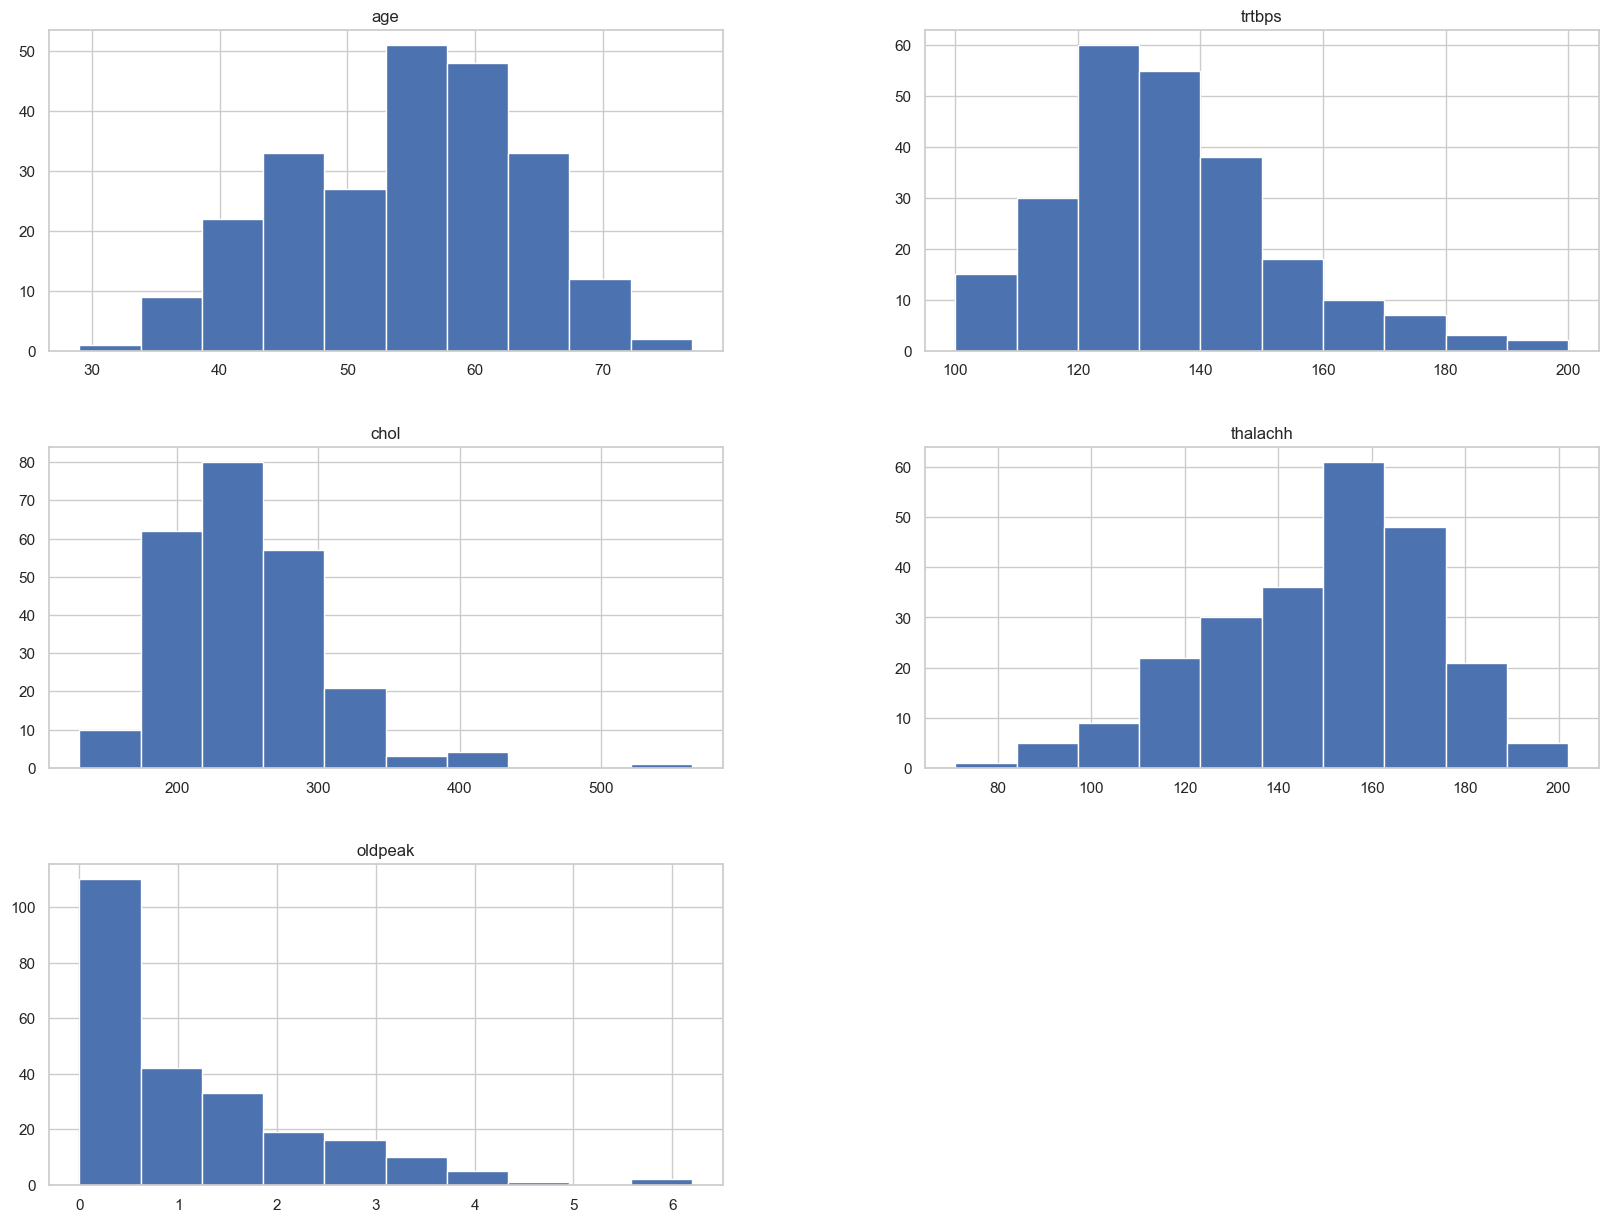

In [20]:
continuous_colums = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
heart_train[continuous_colums].hist(bins = 10, figsize=(20,15))
plt.show()

The frequency distributions of the continuous variables are, with the exception of the variable age, all right- or left-skewed.

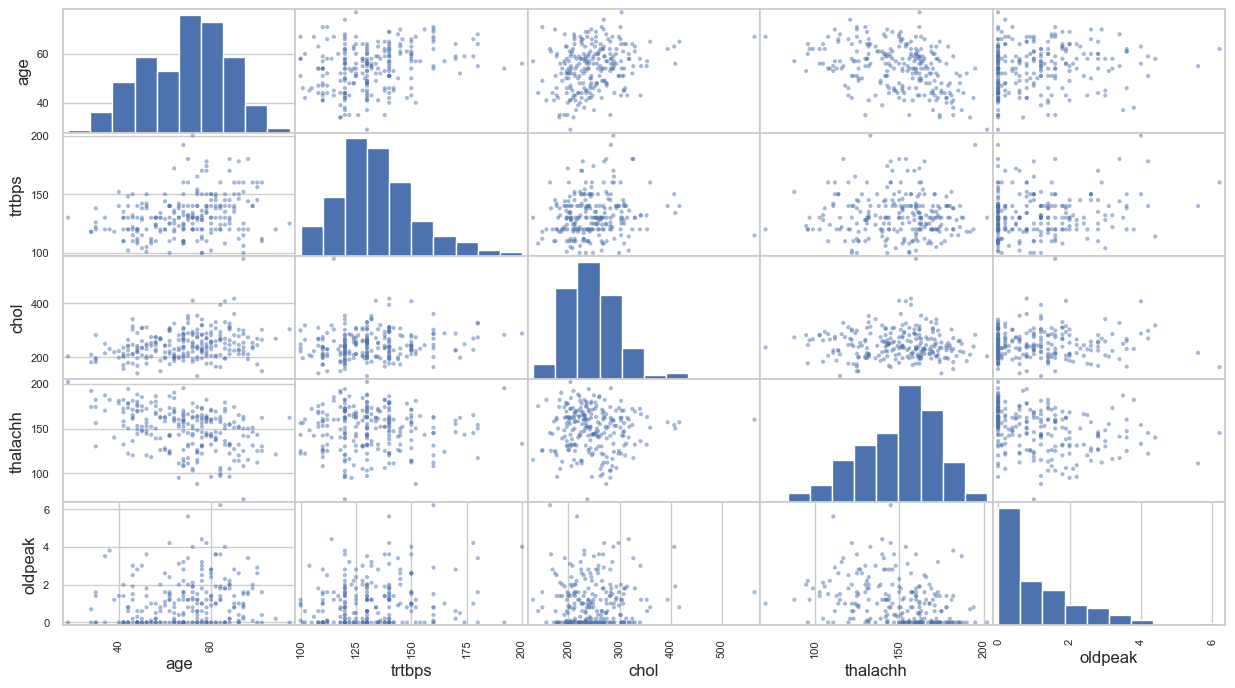

In [21]:
#Correlations
from pandas.plotting import scatter_matrix
ax = scatter_matrix(heart_train[continuous_colums], figsize = (15,8))

As expected, the scatterplots indicate positive correlations between the three risk factors age, blood pressure and cholesterol level.

### Data transformation/Feature scaling (Standardise)
Before starting to estimate the models, the continuous variables are standardised so that they have a mean of 0 and a standard deviation of 1. This allows better estimation results to be achieved.

In [22]:
from sklearn.preprocessing import StandardScaler

continuous_colums = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

scaler = StandardScaler().fit(heart_train[continuous_colums])
scaler_imp = StandardScaler().fit(heart_train_imp[continuous_colums])

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data)
    return data

In [23]:
#Application of the standardisation function to the different data sets
heart_train_stand = scale_data(heart_train,continuous_colums,scaler)
heart_test_stand = scale_data(heart_test,continuous_colums,scaler)
heart_train_imp_stand = scale_data(heart_train_imp,continuous_colums,scaler_imp)
heart_test_imp_stand = scale_data(heart_test_imp,continuous_colums,scaler_imp)

In [24]:
heart_train_stand.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,cp_3,slp_0,slp_1,slp_2,restecg_0,restecg_1,restecg_2,thall_1.0,thall_2.0,thall_3.0
count,2.380000e+02,238.000000,2.380000e+02,2.380000e+02,238.000000,2.380000e+02,238.000000,2.380000e+02,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-2.178463e-16,0.659664,2.005865e-17,2.005865e-17,0.147059,2.005865e-17,0.344538,2.005865e-17,0.693277,0.529412,...,0.075630,0.084034,0.478992,0.436975,0.500000,0.487395,0.012605,0.054622,0.563025,0.382353
std,1.002107e+00,0.474821,1.002107e+00,1.002107e+00,0.354911,1.002107e+00,0.476219,1.002107e+00,0.942681,0.500186,...,0.264963,0.278023,0.500611,0.497057,0.501054,0.500894,0.111797,0.227720,0.497057,0.486986
min,-2.825522e+00,0.000000,-2.825522e+00,-2.825522e+00,0.000000,-2.825522e+00,0.000000,-2.825522e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.143175e-01,0.000000,-7.143175e-01,-7.143175e-01,0.000000,-7.143175e-01,0.000000,-7.143175e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.349489e-02,1.000000,6.349489e-02,6.349489e-02,0.000000,6.349489e-02,0.000000,6.349489e-02,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.301912e-01,1.000000,7.301912e-01,7.301912e-01,0.000000,7.301912e-01,1.000000,7.301912e-01,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.508048e+00,1.000000,2.508048e+00,2.508048e+00,1.000000,2.508048e+00,1.000000,2.508048e+00,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Logistic Regression<a class="anchor" id="Kap2"></a>
+ Define criterion and predictors
+ Set up and estimate model
+ Test model

### Define criterion and predictors

In [25]:
X_train = heart_train_stand.drop(columns = ["cp_0", "slp_0", "restecg_0", "thall_1.0", "output"])
y_train = heart_train_stand["output"]

X_test = heart_test_stand.drop(columns = ["cp_0", "slp_0", "restecg_0", "thall_1.0", "output"])
y_test = heart_test_stand["output"]

In [26]:
X_train2 = heart_train_imp_stand.drop(columns = ["cp_0.0", "slp_0.0", "restecg_0.0", "thall_1.0", "output"])
y_train2 = heart_train_imp_stand["output"]

X_test2 = heart_test_imp_stand.drop(columns = ["cp_0.0", "slp_0.0", "restecg_0.0", "thall_1.0", "output"])
y_test2 = heart_test_imp_stand["output"]

### Set up and estimate model

In [27]:
from sklearn.linear_model import LogisticRegression
   
# create the model object
model_lr = LogisticRegression()
model_lr
    
# fit the model to the training data
model_lr.fit(X_train, y_train, sample_weight=None)

LogisticRegression()

Save Model Prediction for later comparison of models.

In [28]:
y_fit_lr = model_lr.predict(X_test)

Same procedure for the data set with imputed values

In [29]:
model_lr2 = LogisticRegression()
model_lr2.fit(X_train2, y_train2, sample_weight=None)
y_fit_lr2 = model_lr2.predict(X_test2)

### Test model

Determine Accuracy.

In [30]:
model_lr.score(X_test, y_test) #Data with missing values

0.7413793103448276

In [31]:
model_lr2.score(X_test2, y_test2) #Data with imputed values

0.7377049180327869

Create ROC curve

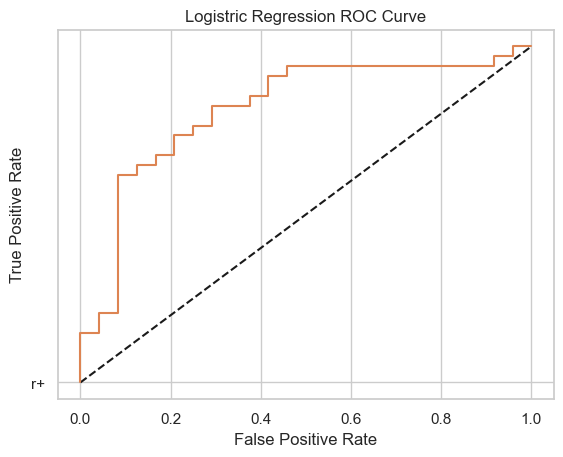

In [32]:
from sklearn.metrics import roc_curve

# calculating the probabilities
y_pred_prob = model_lr.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

Inspect influence of individual predictors.

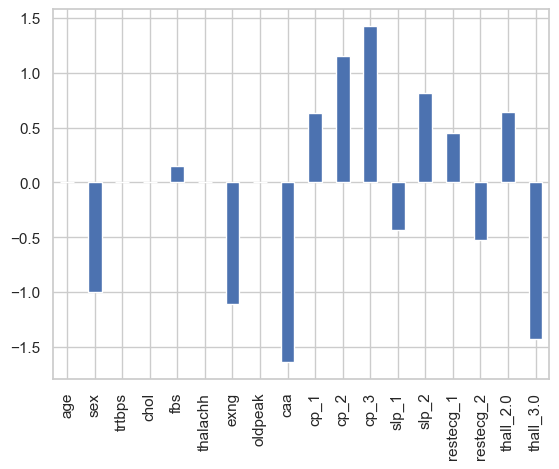

In [33]:
coeffs = pd.DataFrame(data = model_lr.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None);

It is striking that angina pectoris (cp_1, cp_3) has a positive sign (here equivalent to a risk reduction).

## Decision Tree<a class="anchor" id="Kap3"></a>
+ Set up model
+ Graphical representation of results

### Set up model

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)   #max_depth=3, 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

Save model prediction for later comparison of models.

In [35]:
y_fit_dt = dt.predict(X_test)

In [36]:
dt.score(X_test, y_test) # Accuracy for data set with missing values

0.7068965517241379

Decision tree for data set with imputed values:

In [37]:
dt.fit(X_train2,y_train2)
y_fit_dt2 = dt.predict(X_test2)

In [38]:
dt.score(X_test2,y_test2) #Accuracy for data set with imputed values

0.6885245901639344

### Graphical representation of results

## Random Forest<a class="anchor" id="Kap4"></a>

+ Hyperparameter optimisation via grid search
+ Estimate model
+ Display results

In [39]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [1,2,4,8,10],
    'min_samples_leaf': [1,2,5,10],
    'min_samples_split': [1,2,5,10],
    'n_estimators': [10,50,100,1000]
}
#Base model
rf = RandomForestClassifier(random_state = 42)
#Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           n_jobs = -1, verbose = 2)

In [40]:
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


C:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Python\Python311\Lib\site-packages\sklearn\utils\_para

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [1, 2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100, 1000]},
             verbose=2)

Check which hyperparameter combination(s) triggered the warning message and whether the grid search should therefore be changed.

In [41]:
#grid_search_rf.cv_results_

The warning message can be ignored. For exactly one of the 16380 hyperparameter combinations ('max_depth': 4,
   'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100) no value could be calculated.

In [42]:
#best parameters
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [43]:
#Apply best model to test data
model_rf1 = grid_search_rf.best_estimator_
y_fit_rf1 = model_rf1.predict(X_test)

In [44]:
#Random forest for data set with imputed values
grid_search_rf2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [45]:
grid_search_rf2.fit(X_train2,y_train2)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


C:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Python\Python311\Lib\site-packages\sklearn\utils\_para

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [1, 2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100, 1000]},
             verbose=2)

Check which hyperparameter combination(s) triggered the warning message and whether the grid search should therefore be changed.

In [46]:
#grid_search_rf2.cv_results_

As with the first model, only a combination of hyperparameters causes problems.

In [47]:
#best parameters
grid_search_rf2.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

In [48]:
#Apply best model to test data
model_rf2 = grid_search_rf2.best_estimator_
y_fit_rf2 = model_rf2.predict(X_test2)

Optional: Shapley Values

Shapley values can be used to determine the influence of individual variables on the output of the model. This is helpful because many models from the machine learning field are difficult to interpret. Here, for a selected patient, it is shown how the model variables explain the output of the model (f(x) = 0.80). Variables coloured blue reduce the output value (since 0 = CHD, they increase the risk of CHD in this patient). In the case shown, the occurrence of chest pain after exercise and male gender have the greatest influence. Variables coloured red increase the output value and have a negative effect on the risk.

## Support Vector Machines<a class="anchor" id="Kap5"></a>

+ Hyperparameter optimisation via grid search
+ Estimate model
+ Show results

Grid Search Model with missing values

In [52]:
from sklearn import svm

model_svm = svm.SVC()
param_grid = [
  {'C': [0.1, 1, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 100, 1000], 'gamma': [1,0.1, 0.001, 0.0001, 1/len(X_train)], 'kernel': ['rbf']},
 ]

grid_search = GridSearchCV(model_svm, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 100, 1000],
                          'gamma': [1, 0.1, 0.001, 0.0001,
                                    0.004201680672268907],
                          'kernel': ['rbf']}])

In [53]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.004201680672268907, 'kernel': 'rbf'}


In [54]:
#Apply best model to test data and store fitted values
model_svm1 = grid_search.best_estimator_
y_fit_svm1 = model_svm1.predict(X_test)

The same again for the model with imputed values:

In [55]:
#Grid Search
grid_search2 = GridSearchCV(model_svm, param_grid)
grid_search2.fit(X_train2, y_train2)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 100, 1000],
                          'gamma': [1, 0.1, 0.001, 0.0001,
                                    0.004201680672268907],
                          'kernel': ['rbf']}])

In [56]:
print(grid_search2.best_params_)

{'C': 100, 'gamma': 0.004201680672268907, 'kernel': 'rbf'}


In [57]:
#Apply best model to test data and store fitted values
model_svm2 = grid_search2.best_estimator_
y_fit_svm2 = model_svm2.predict(X_test2)

Optional: Calculate Shapley Values and then plot them

## Comparison of Models<a class="anchor" id="Kap6"></a>

The estimated models are compared with each other using three measures of quality:
   + Accuracy: Proportion of correctly prognosticated patients
   + Precision: Proportion of correctly predicted patients with heart disease out of all patients predicted to have heart disease (True Positives / (True Positives + False Positives)
   + Recall: Proportion of correctly predicted patients out of all patients with heart disease (True Positives / (True Positives + False Negatives)

Function that calculates some quality measures:

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def performance(y_test,y_fit):
    accuracy = accuracy_score(y_test, y_fit) * 100
    precision = precision_score(y_test, y_fit) * 100
    recall = recall_score(y_test, y_fit) * 100
    scores = [accuracy,precision,recall]
    
    return scores

Calculation of the quality measures for each model and subsequent presentation in a table (1 = model with missing values; 2 = model with imputed values):

In [60]:
scores_lr1 = performance(y_test, y_fit_lr)

In [61]:
scores_lr2 = performance(y_test2, y_fit_lr2)

In [ ]:
scores_svm1 = performance(y_test, y_fit_svm1)

In [ ]:
scores_svm2 = performance(y_test2,y_fit_svm2)

In [ ]:
scores_tree1 = performance(y_test,y_fit_dt)

In [65]:
scores_tree2 = performance(y_test2,y_fit_dt2)

In [66]:
scores_rf1 = performance(y_test,y_fit_rf1)

In [67]:
scores_rf2 = performance(y_test2,y_fit_rf2)

In [68]:
final = pd.DataFrame(list(zip(scores_lr1,scores_tree1, scores_rf1, scores_svm1)),
               columns =['LR', 'DT','RF','SVM'], index = ["Accuracy", "Precision", "Recall"])

In [69]:
final2 = pd.DataFrame(list(zip(scores_lr2, scores_tree2,scores_rf2,scores_svm2)),
               columns =['LR', 'DT', 'RF','SVM'], index = ["Accuracy", "Precision", "Recall"])

In [70]:
print("Model quality, data set with missing values:")
print(final)

Model quality, data set with missing values:
                  LR         DT         RF        SVM
Accuracy   74.137931  70.689655  77.586207  75.862069
Precision  78.787879  79.310345  83.870968  77.777778
Recall     76.470588  67.647059  76.470588  82.352941


In [71]:
print("Model quality, data set with missing values:")
print(final2)

Model quality, data set with missing values:
                  LR         DT         RF        SVM
Accuracy   73.770492  68.852459  73.770492  75.409836
Precision  77.142857  76.666667  78.787879  76.315789
Recall     77.142857  65.714286  74.285714  82.857143


**Which model performs best?**
With the exception of the decision tree, all models perform about equally well. For Random Forest and SVM, the differences between Precision and Recall are greater than for logistic regression. It hardly makes a difference whether the missing values were imputed or whether cases with missing values were excluded from the analysis (this can be explained by the small number of cases with missing values).